In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv("train.csv")

In [3]:
data1.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
data1.shape

(88858, 10)

In [5]:
data1.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [6]:
data1.isnull().sum()/88858

ID                         0.000000
Estimated_Insects_Count    0.000000
Crop_Type                  0.000000
Soil_Type                  0.000000
Pesticide_Use_Category     0.000000
Number_Doses_Week          0.000000
Number_Weeks_Used          0.101285
Number_Weeks_Quit          0.000000
Season                     0.000000
Crop_Damage                0.000000
dtype: float64

In [7]:
data1['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65., 67.])

In [8]:
data1['Number_Weeks_Used'] = data1['Number_Weeks_Used'].fillna(value = data1['Number_Weeks_Used'].mean())

In [9]:
data1['Number_Weeks_Used'].unique()

array([ 0.        , 28.62397005, 26.        , 20.        , 15.        ,
       14.        , 19.        , 24.        ,  8.        , 23.        ,
       25.        , 28.        , 29.        , 22.        , 21.        ,
       17.        , 30.        , 35.        , 32.        , 27.        ,
       16.        , 31.        , 33.        , 34.        , 39.        ,
       38.        , 42.        , 40.        , 41.        , 36.        ,
       44.        , 37.        , 46.        , 45.        , 47.        ,
       43.        , 50.        , 10.        , 49.        , 53.        ,
       48.        , 51.        , 54.        , 52.        , 55.        ,
       56.        , 61.        , 18.        , 57.        , 62.        ,
       60.        , 63.        , 66.        , 59.        , 64.        ,
       13.        ,  7.        ,  5.        , 12.        ,  6.        ,
        9.        , 58.        , 11.        , 65.        , 67.        ])

In [10]:
numerical_data = [feature for feature in data1.columns if data1[feature].dtypes != 'O']

In [11]:
numerical_data

['Estimated_Insects_Count',
 'Crop_Type',
 'Soil_Type',
 'Pesticide_Use_Category',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit',
 'Season',
 'Crop_Damage']

In [12]:
""""def univariate(data,var):
    size = len(var)
    plt.figure(figsize = (size,3),dpi=100)
    
    for i,j in enumerate(var):
        mini = data[i].min()
        maxi = data[i].max()
        ran  = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        std  = data[i].std()
        skewness = data[i].skewness()
        kurotsis = data[i].kurotsis
        
        points = mean-std,mean+std
        
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i],shade = True)
        sns.lineplot(points[i],[0,0],color = 'black',label = 'std')
        sns.scatterplot([mini,maxi],[0,0],color = 'orange',label = 'mini/maxi')
        sns.scatterplot([mean],[0],color = 'red',label = 'mean')
        sns.scatterplot(median,[0],color = 'blue',label = 'median')
        plt.xlabel('{}'.format(i),fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurtsis,2),
                                                                                                   round(skewness,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
                                                                                                   """

'"def univariate(data,var):\n    size = len(var)\n    plt.figure(figsize = (size,3),dpi=100)\n    \n    for i,j in enumerate(var):\n        mini = data[i].min()\n        maxi = data[i].max()\n        ran  = data[i].max() - data[i].min()\n        mean = data[i].mean()\n        median = data[i].median()\n        std  = data[i].std()\n        skewness = data[i].skewness()\n        kurotsis = data[i].kurotsis\n        \n        points = mean-std,mean+std\n        \n        plt.subplot(1,size,j+1)\n        sns.kdeplot(data[i],shade = True)\n        sns.lineplot(points[i],[0,0],color = \'black\',label = \'std\')\n        sns.scatterplot([mini,maxi],[0,0],color = \'orange\',label = \'mini/maxi\')\n        sns.scatterplot([mean],[0],color = \'red\',label = \'mean\')\n        sns.scatterplot(median,[0],color = \'blue\',label = \'median\')\n        plt.xlabel(\'{}\'.format(i),fontsize = 20)\n        plt.ylabel(\'density\')\n        plt.title(\'std_dev = {}; kurtosis = {};\nskew = {}; range = {}\

In [13]:
#univariate(data1,numerical_data)

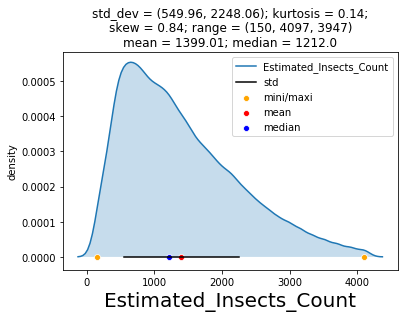

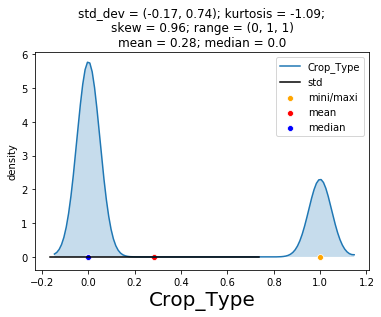

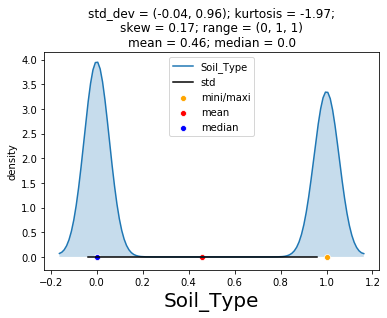

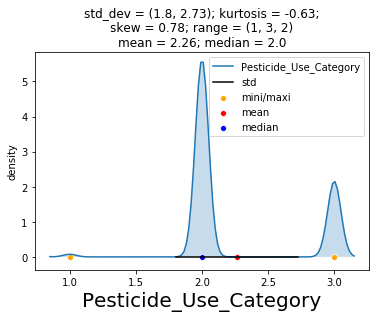

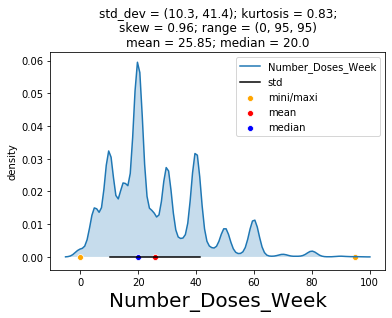

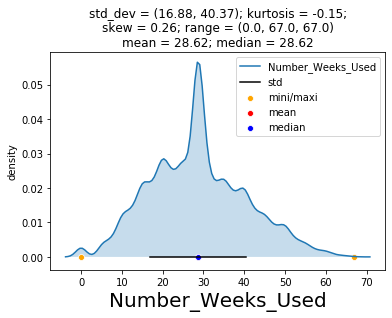

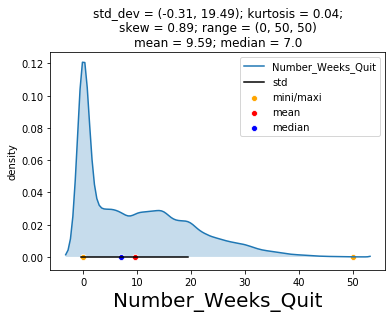

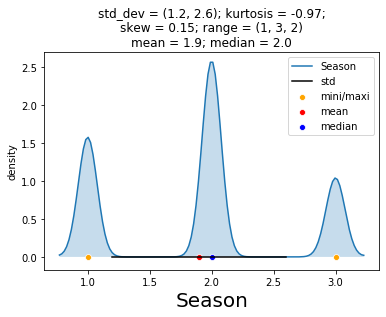

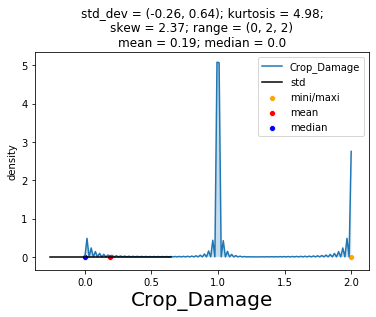

In [14]:
for feature in numerical_data:
        data2 = data1.copy()
        mini = data2[feature].min()
        maxi = data2[feature].max()
        ran  = data2[feature].max() - data2[feature].min()
        mean = data2[feature].mean()
        median = data2[feature].median()
        std  = data2[feature].std()
        skewness = data2[feature].skew()
        kurotsis = data2[feature].kurtosis()
        points = mean-std,mean+std
        #print(mini,maxi)
        
        #plt.subplot(1,size,j+1)
        sns.kdeplot(data2[feature],shade = True)
        sns.lineplot(points,[0,0],color = 'black',label = 'std')
        sns.scatterplot([mini,maxi],[0,0],color = 'orange',label = 'mini/maxi')
        sns.scatterplot([mean],[0],color = 'red',label = 'mean')
        sns.scatterplot(median,[0],color = 'blue',label = 'median')
        plt.xlabel('{}'.format(feature),fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurotsis,2),
                                                                                                   round(skewness,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
        plt.show()
                                                                                                   

# correlation Matrix

In [15]:
correlation = data2[numerical_data].corr()
correlation

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.412904,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.041679,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.066420,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.326233,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.119778,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.412904,-0.041679,-0.066420,0.326233,0.119778,1.000000,-0.425763,0.004188,0.219621
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.425763,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004188,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.219621,-0.133117,-0.000184,1.000000


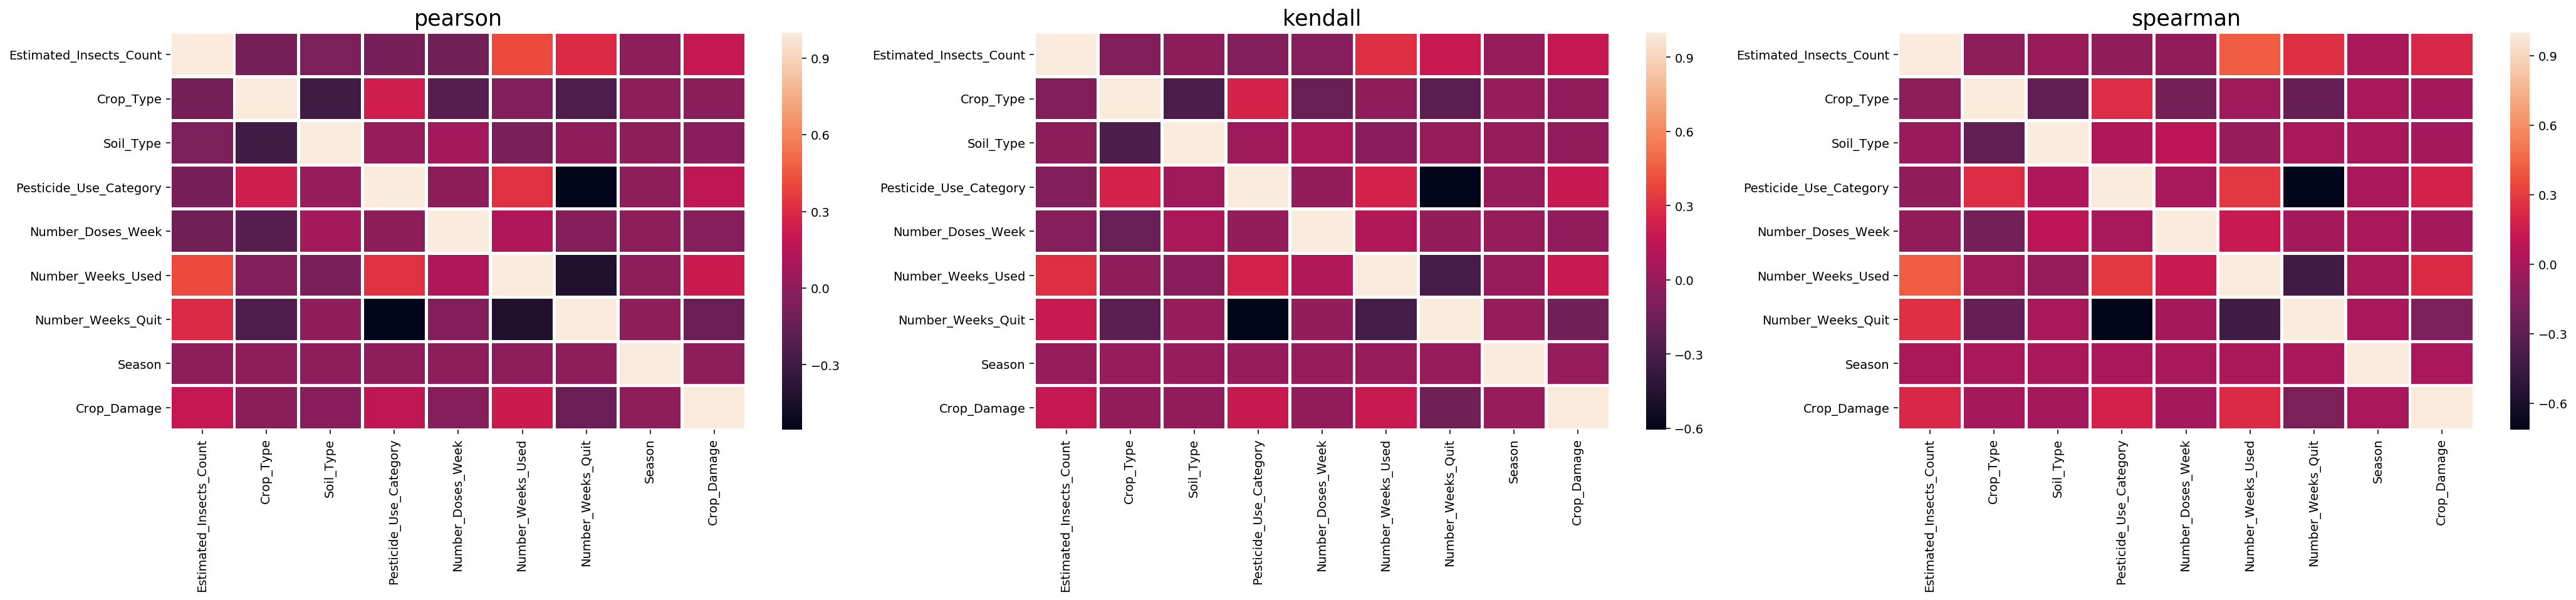

In [16]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = data2[numerical_data].corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

In [17]:
data2.pivot_table('Crop_Damage',['Crop_Type','Soil_Type'],'Season',aggfunc = sum)

Season                  1     2     3
Crop_Type Soil_Type                  
0         0          2044  3419  1347
          1          1701  2807  1100
1         0           836  1423   544
          1           489   894   329

In [18]:
data2.pivot_table('Crop_Damage',['Crop_Type','Soil_Type'],'Pesticide_Use_Category',aggfunc = sum)

Pesticide_Use_Category      1       2       3
Crop_Type Soil_Type                          
0         0             181.0  3490.0  3139.0
          1             188.0  3163.0  2257.0
1         0             261.0   777.0  1765.0
          1             254.0     NaN  1458.0

In [19]:
data2.pivot_table('Crop_Damage',['Crop_Type','Soil_Type'],'Pesticide_Use_Category',aggfunc = sum)

Pesticide_Use_Category      1       2       3
Crop_Type Soil_Type                          
0         0             181.0  3490.0  3139.0
          1             188.0  3163.0  2257.0
1         0             261.0   777.0  1765.0
          1             254.0     NaN  1458.0

In [20]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')


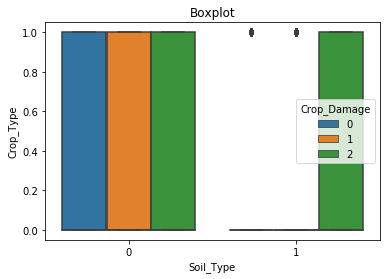

In [21]:
Grouped_Box_Plot(data2,'Crop_Type', 'Soil_Type', 'Crop_Damage')

In [22]:
data2

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


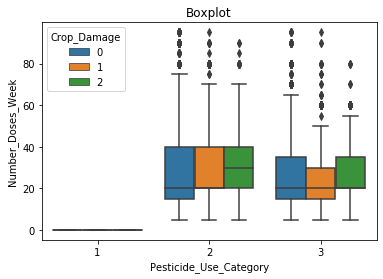

In [23]:
Grouped_Box_Plot(data2,'Number_Doses_Week','Pesticide_Use_Category','Crop_Damage')

In [24]:
data1 = data1.drop('ID',axis=1)

In [25]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
x1 = scaler.fit(data1)

In [26]:
#x1 = pd.DataFrame(x1,columns = )

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,random_state = 56,test_size=0.20)

In [28]:
x_train = data1.drop(['Crop_Damage'],axis=1)
y_train = data1['Crop_Damage']

In [30]:
data1

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3,0
88854,3516,1,0,2,10,20.0,38,1,0
88855,3516,1,0,2,15,40.0,8,2,0
88856,3702,1,0,2,10,25.0,18,3,0


In [31]:
x_train.shape,y_test.shape

((71086, 8), (17772,))

In [32]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [43]:
#training and testing the model
cls = knn(n_neighbors = 13)
cls.fit(x_train,y_train)
test_predict = cls.predict(x_test)
k = cls.score(x_train,y_train)
k1 = cls.score(x_test,y_test)
k2 = accuracy_score(y_test,test_predict)
print("the accuracy score is:",k,k1,k2)

the accuracy score is: 0.8476071237655797 0.8349651136619402 0.8349651136619402


In [36]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( knn(n_neighbors = 3),  x_train, y_train, cv = 15)
score

array([0.81375237, 0.80658089, 0.80869015, 0.80312302, 0.81135261,
       0.80755434, 0.80860941, 0.81240768, 0.80734332, 0.80523317,
       0.80160405, 0.80688054, 0.80878008, 0.8081469 , 0.8081469 ])

In [37]:
score.mean()*100, score.std()*100

(80.7880361702721, 0.3069064860480211)

In [38]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( knn(n_neighbors = i) , x_train, y = y_train, cv = 10)
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [39]:
n_neighbors = range(1,50)
mean, std = Val_score(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

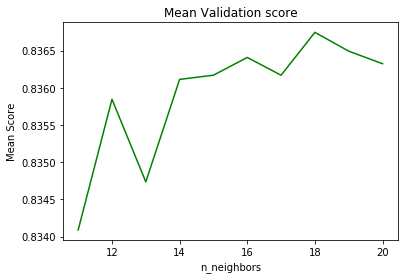

In [40]:
plt.plot(n_neighbors[10:20], mean[10:20], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

Text(0.5, 1.0, 'Standard Deviation of Validation score')

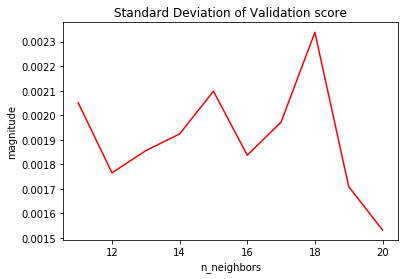

In [44]:
plt.plot(n_neighbors[10:20], std[10:20], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

In [47]:
clf = knn(n_neighbors = 14 )
clf.fit(x_train, y_train)

score1 = clf.score(x_train, y_train)

score = clf.score(x_test, y_test)

y_predict = clf.predict(x_test)

score2 = accuracy_score(y_test,y_predict)
score, score1,score2

(0.8355840648210668, 0.8468193455814085, 0.8355840648210668)

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(' Accuracy: ', accuracy_score(y_pred, y_test))

In [ ]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,15):
    model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    validation_accuracy.append(model.score(x_test, y_test))

In [ ]:
frame = pd.DataFrame({'max_depth':range(1,15), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head(15)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()